In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('monthly_spending_dataset_2020_2025.csv')

In [3]:
df.head()

,Month,Groceries (₹),Rent (₹),Transportation (₹),Gym (₹),Utilities (₹),Healthcare (₹),Investments (₹),Savings (₹),EMI/Loans (₹),Dining & Entertainment (₹),Shopping & Wants (₹),Total Expenditure (₹),Income (₹)
0,2020-01-01,4860,10000,2595,888,1520,1930,4311,4232,0,3138,1121,30363,40000
1,2020-02-01,6135,10000,2371,851,1630,1923,5939,7329,0,3185,2332,34366,40000
2,2020-03-01,6853,10000,2715,1143,1776,1185,4700,3625,0,2684,1459,32515,36000
3,2020-04-01,6904,10000,2582,869,1975,1274,4420,6426,0,2475,2806,33305,36000
4,2020-05-01,4562,10000,3028,830,1984,1631,4410,3647,0,2146,1020,29611,36000


# SUMMARY

Qual é a renda média mensal ao longo do período analisado?

In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
round(df['Income (₹)'].mean())

50446

Qual é o gasto total médio mensal?

In [7]:
round(df['Total Expenditure (₹)'].mean())


36704

Em quantos meses os gastos totais ultrapassaram a renda?

In [8]:
(df['Total Expenditure (₹)'] > df['Income (₹)']).sum()

0

Qual categoria apresenta o maior gasto médio mensal?

In [9]:
df[
    [
        'Groceries (₹)', 'Rent (₹)', 'Transportation (₹)', 'Gym (₹)',
        'Utilities (₹)', 'Healthcare (₹)', 'EMI/Loans (₹)',
        'Dining & Entertainment (₹)', 'Shopping & Wants (₹)'
    ]
].mean().sort_values(ascending=False).head(1)



Rent (₹)    11000.0
dtype: float64

Qual categoria apresenta o menor gasto médio mensal?

In [10]:
df[
    [
        'Groceries (₹)', 'Rent (₹)', 'Transportation (₹)', 'Gym (₹)',
        'Utilities (₹)', 'Healthcare (₹)', 'EMI/Loans (₹)',
        'Dining & Entertainment (₹)', 'Shopping & Wants (₹)'
    ]
].mean().sort_values(ascending=False).tail(1)

Gym (₹)    967.768116
dtype: float64

Qual é o valor médio mensal poupado?

In [11]:
round(df['Savings (₹)'].mean())

7613

Qual é o valor médio mensal investido?

In [12]:
round(df['Investments (₹)'].mean())

6317

Qual é o peso percentual do aluguel em relação à renda mensal?

In [13]:
df['Rent_Percentage'] = (df['Rent (₹)'] / df['Income (₹)']) * 100
print(f"{round(df['Rent_Percentage'].mean())}%")

22%


Qual é a percentagem dos gastos essenciais no total de despesas?

In [14]:
essential_cols = ['Groceries (₹)', 'Rent (₹)', 'Transportation (₹)', 'Utilities (₹)', 'Healthcare (₹)', 'EMI/Loans (₹)']

essentials_total = df[essential_cols].sum().sum()       # soma de todas as categorias essenciais
total_expenditure = df['Total Expenditure (₹)'].sum()  # soma de todas as despesas

percent_essentials = (essentials_total / total_expenditure) * 100
print(f"{round(percent_essentials)}%")

67%


Qual é a percentagem dos gastos não essenciais no total de despesas?

In [15]:
no_essential_cols = ['Gym (₹)', 'Dining & Entertainment (₹)', 'Shopping & Wants (₹)']

no_essentials_total = df[no_essential_cols].sum().sum()       # soma de todas as categorias no_essenciais
total_expenditure = df['Total Expenditure (₹)'].sum()  # soma de todas as despesas

percent_essentials = (no_essentials_total / total_expenditure) * 100
print(f"{round(percent_essentials)}%")

15%


# INSIGHTS

Existe relação entre aumento de renda e aumento de gastos totais?

In [16]:
round(df['Rent (₹)'].corr(df['Total Expenditure (₹)']))

1

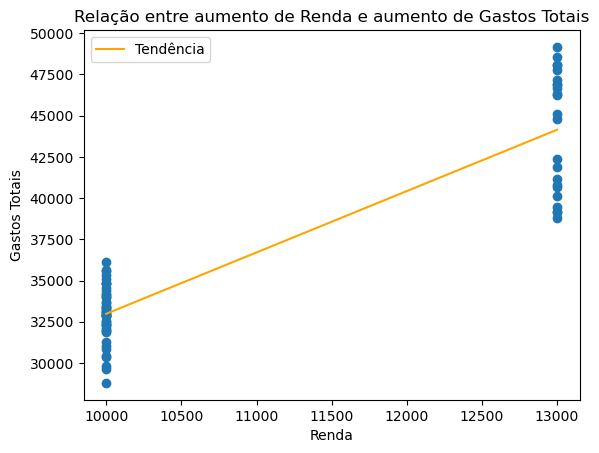

In [8]:
renda = df['Rent (₹)']
gastos_mensais = df['Total Expenditure (₹)']
inclinacao, intercepto = np.polyfit(renda, gastos_mensais, 1)
plt.plot(renda, inclinacao*renda + intercepto, color='orange', label='Tendência')
plt.legend()
plt.scatter(renda, gastos_mensais)
plt.title('Relação entre aumento de Renda e aumento de Gastos Totais')
plt.xlabel('Renda')
plt.ylabel('Gastos Totais')
plt.show()

A renda influencia diretamente o nível de poupança?

In [17]:
round(df['Income (₹)'].corr(df['Savings (₹)']))

1

O aumento da renda resulta em maior investimento?

In [18]:
round(df['Income (₹)'].corr(df['Investments (₹)']))

1

Gastos com lazer reduzem a capacidade de poupança?

In [19]:
round(df['Dining & Entertainment (₹)'].corr(df['Savings (₹)']))

0

Compras não essenciais impactam o equilíbrio financeiro mensal?

In [20]:
no_essential = ['Gym (₹)', 'Dining & Entertainment (₹)', 'Shopping & Wants (₹)']
df['No_Essential_Total'] = df[no_essential_cols].sum(axis=1) # Faz a soma por linha(---)

round(df['No_Essential_Total'].corr(df['Income (₹)']))


0

Em meses de maior investimento, os gastos com lazer diminuem?

In [21]:
media_investimento = round(df['Investments (₹)'].mean())
round((df['Investments (₹)'] > media_investimento).corr(df['Dining & Entertainment (₹)']))

0

As despesas com saúde aumentam ao longo do tempo?

In [22]:
df.groupby('Month')['Healthcare (₹)'].mean()


Month
2020-01-01    1930.0
2020-02-01    1923.0
2020-03-01    1185.0
2020-04-01    1274.0
2020-05-01    1631.0
               ...  
2025-05-01    2890.0
2025-06-01    2068.0
2025-07-01    2686.0
2025-08-01    2776.0
2025-09-01    2717.0
Name: Healthcare (₹), Length: 69, dtype: float64

O crescimento do custo de vida afeta a taxa de poupança?

In [23]:
essential_cols = ['Groceries (₹)', 'Rent (₹)', 'Transportation (₹)', 'Utilities (₹)', 'Healthcare (₹)', 'EMI/Loans (₹)']
df['Essential_Total'] = df[essential_cols].sum(axis=1) # Faz a soma por linha(---)

round(df['Essential_Total'].corr(df['Savings (₹)']))

1

Há um padrão sazonal nos gastos mensais?

In [24]:
round(df.groupby(df['Month'].dt.month)['Total Expenditure (₹)'].mean())

Month
1     36805.0
2     36541.0
3     36669.0
4     36534.0
5     36120.0
6     36470.0
7     37581.0
8     36824.0
9     37203.0
10    36036.0
11    35776.0
12    37807.0
Name: Total Expenditure (₹), dtype: float64

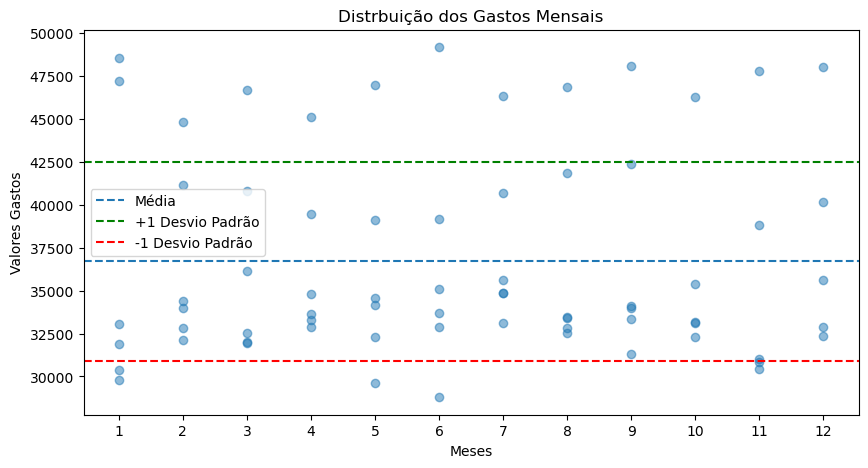

In [48]:
meses = df['Month'].dt.month
gastos_mensais = df['Total Expenditure (₹)']

media_gastos_mensais = np.mean(gastos_mensais)
desvio = np.std(gastos)

plt.figure(figsize=(10, 5))
plt.scatter(meses,gastos_mensais,alpha=0.5)
plt.axhline(media_gastos_mensais, linestyle='--', label='Média')
plt.axhline(media_gastos_mensais + desvio, linestyle='--', label='+1 Desvio Padrão', color='green')
plt.axhline(media_gastos_mensais - desvio, linestyle='--', label='-1 Desvio Padrão', color='red')

plt.title('Distrbuição dos Gastos Mensais')
plt.xlabel('Meses')
plt.ylabel('Valores Gastos')
plt.legend(loc=0)
plt.xticks(np.arange(1, 13))
plt.show()

O pagamento de empréstimos compromete significativamente a renda?

In [25]:
round(df['EMI/Loans (₹)'].corr(df['Income (₹)']))

1